**AIRLINE PASSENGER SATISFACTION**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-be66731189b6>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


**LOAD AND CHECK DATA**

In [ ]:
train_df = pd.read_csv("/test.csv")
test_df = pd.read_csv("/test.csv")

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

train_df = train_df.iloc[:1500,::]
test_df = test_df.iloc[:300,::]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1503
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         1500 non-null   int64  
 1   id                                 1500 non-null   int64  
 2   Gender                             1500 non-null   object 
 3   Customer Type                      1500 non-null   object 
 4   Age                                1500 non-null   int64  
 5   Type of Travel                     1500 non-null   object 
 6   Class                              1500 non-null   object 
 7   Flight Distance                    1500 non-null   int64  
 8   Inflight wifi service              1500 non-null   int64  
 9   Departure/Arrival time convenient  1500 non-null   int64  
 10  Ease of Online booking             1500 non-null   int64  
 11  Gate location                      1500 non-null   int64

In [ ]:
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


**PERCENTAGE OF MISSING VALUES IN OUR DATA**

In [ ]:
train_df.isna().sum() / train_df.shape[0] * 100

Unnamed: 0                           0.0
id                                   0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction    

In [ ]:
# Drop unnamed unnecessary variables

train_df.drop(["Unnamed: 0","id"],axis=1, inplace=True)

# Convert target variable 'satisfaction' to binary values for easier data analysis

train_df.satisfaction = [1 if x == "satisfied" else 0 for x in train_df.satisfaction]

train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [ ]:
# Remove spaces between variable names
train_df.columns = [x.split()[0] + "_" + x.split()[1] + "_" + x.split()[2] + "_" + x.split()[3] if len(x.split()) > 3 else x for x in train_df.columns]
train_df.columns = [x.split()[0] + "_" + x.split()[1] + "_" + x.split()[2] if len(x.split()) > 2 else x for x in train_df.columns]
train_df.columns = [x.split()[0] + "_" + x.split()[1] if len(x.split()) > 1 else x for x in train_df.columns]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1503
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             1500 non-null   object 
 1   Customer_Type                      1500 non-null   object 
 2   Age                                1500 non-null   int64  
 3   Type_of_Travel                     1500 non-null   object 
 4   Class                              1500 non-null   object 
 5   Flight_Distance                    1500 non-null   int64  
 6   Inflight_wifi_service              1500 non-null   int64  
 7   Departure/Arrival_time_convenient  1500 non-null   int64  
 8   Ease_of_Online_booking             1500 non-null   int64  
 9   Gate_location                      1500 non-null   int64  
 10  Food_and_drink                     1500 non-null   int64  
 11  Online_boarding                    1500 non-null   int64

**VARIABLE DESCRIPTION**


Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

**CATEGORICAL VARIABLE**

In [ ]:
 # Understanding categorical variables by Simple Visualization using the matplotlib library.

def bar_plot(variable):
    # we get the features
    var = train_df[variable]
    # count number of categorical variable
    varValue = var.value_counts()

    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

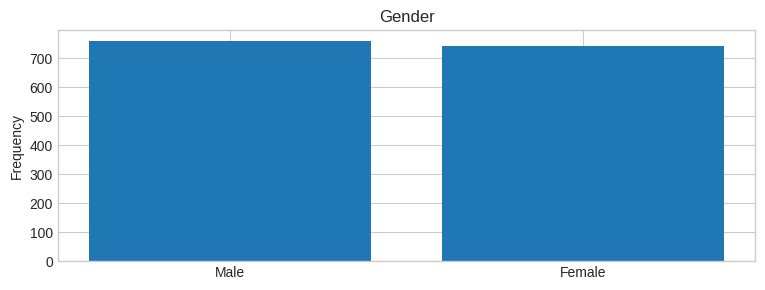

Gender: 
 Male      759
Female    741
Name: Gender, dtype: int64


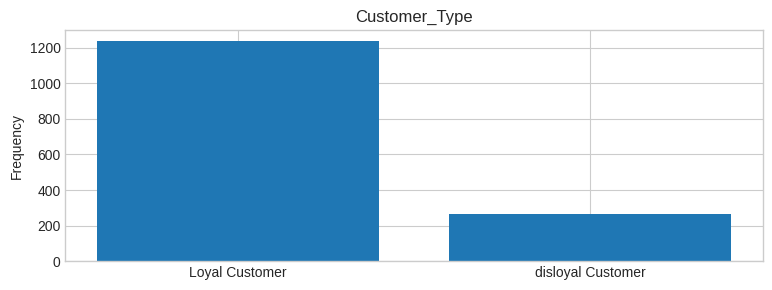

Customer_Type: 
 Loyal Customer       1236
disloyal Customer     264
Name: Customer_Type, dtype: int64


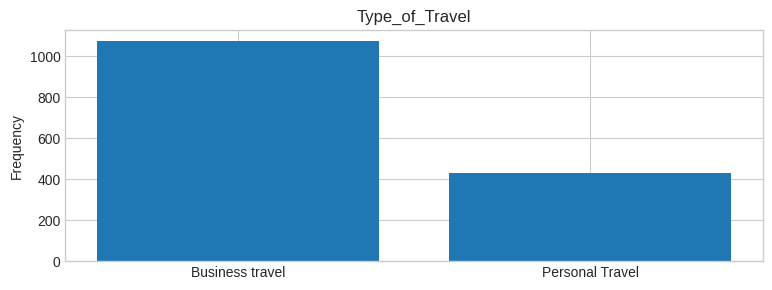

Type_of_Travel: 
 Business travel    1072
Personal Travel     428
Name: Type_of_Travel, dtype: int64


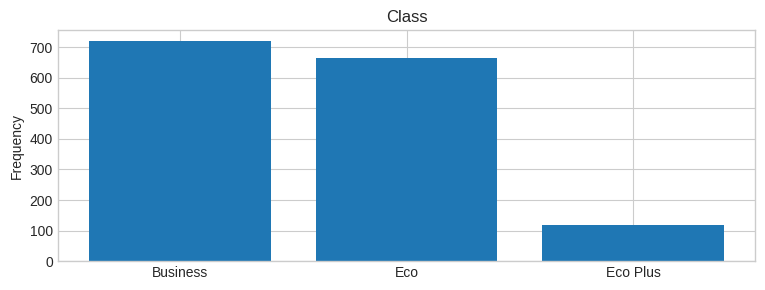

Class: 
 Business    719
Eco         664
Eco Plus    117
Name: Class, dtype: int64


In [ ]:
categorical_var = ["Gender", "Customer_Type", "Type_of_Travel", "Class"]
for each in categorical_var:
    bar_plot(each)

**NUMERICAL VARIABLE**

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

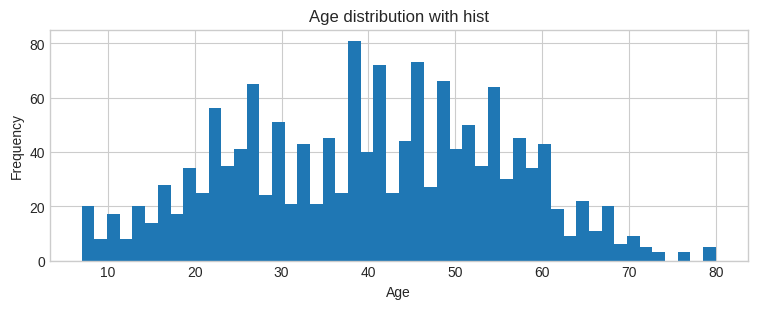

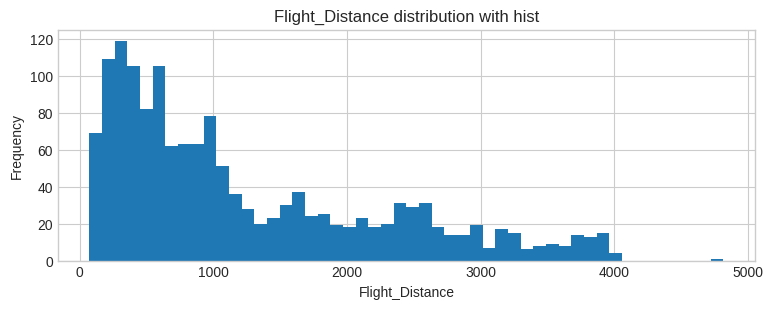

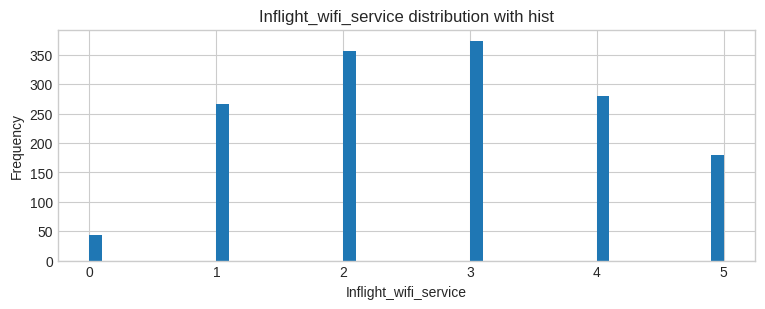

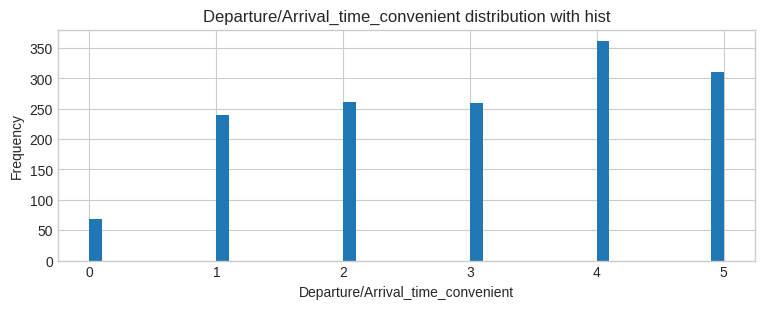

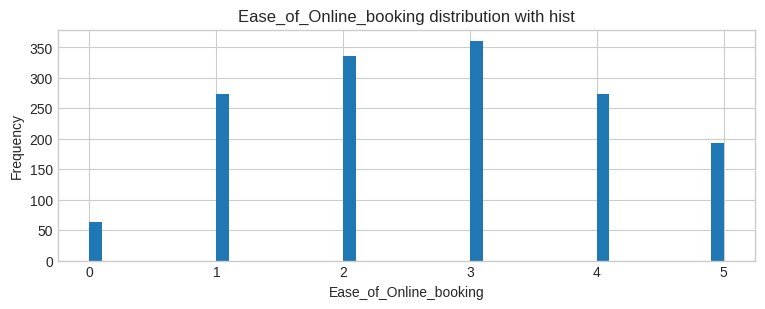

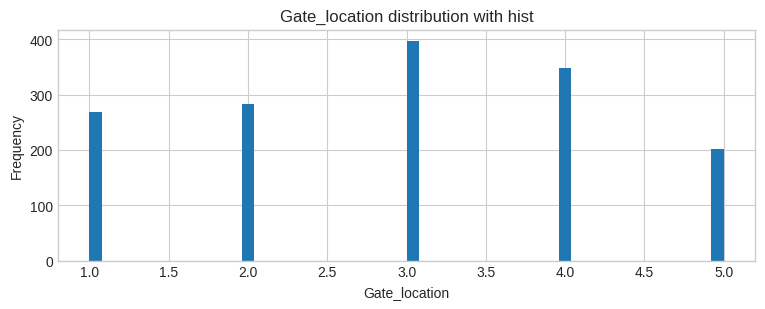

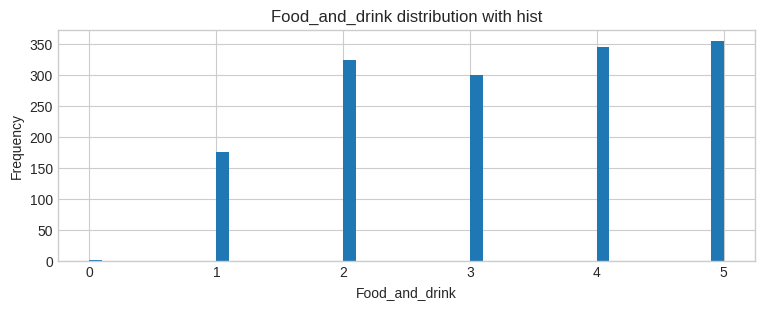

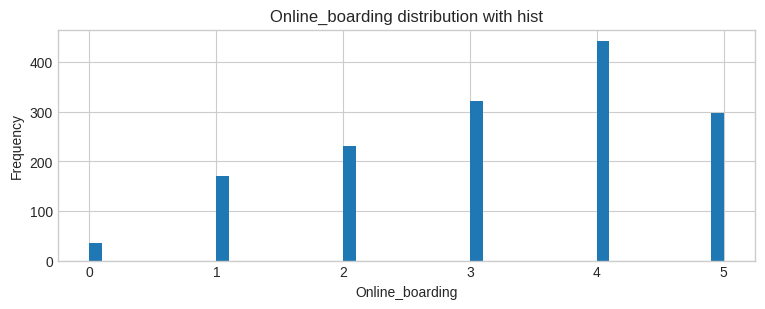

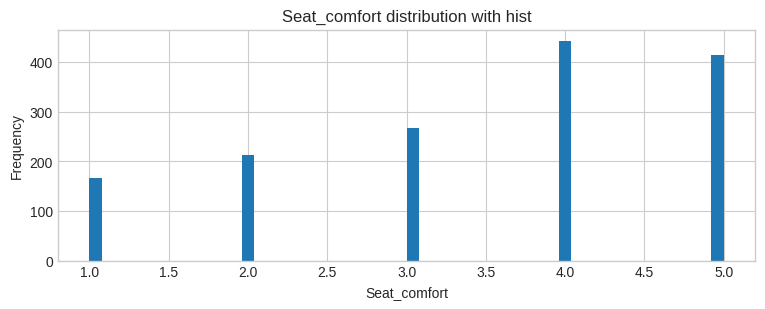

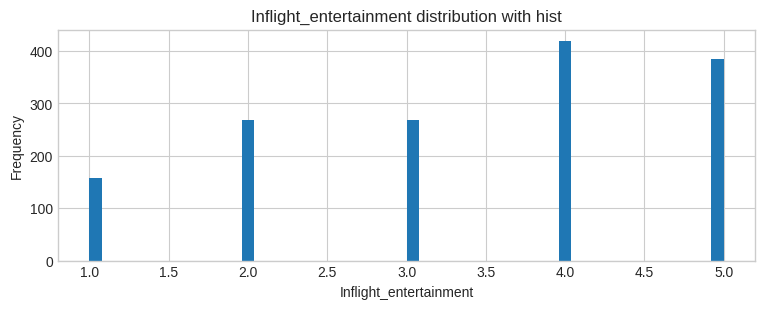

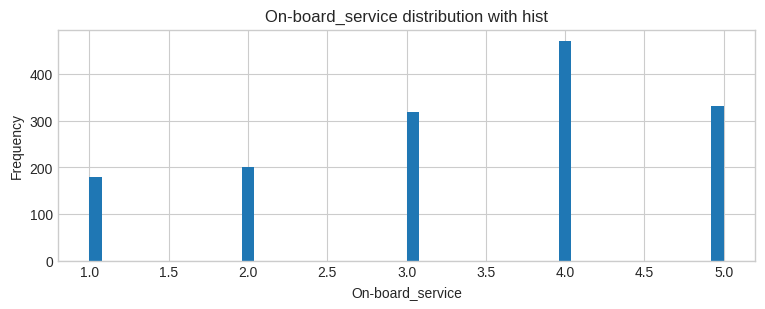

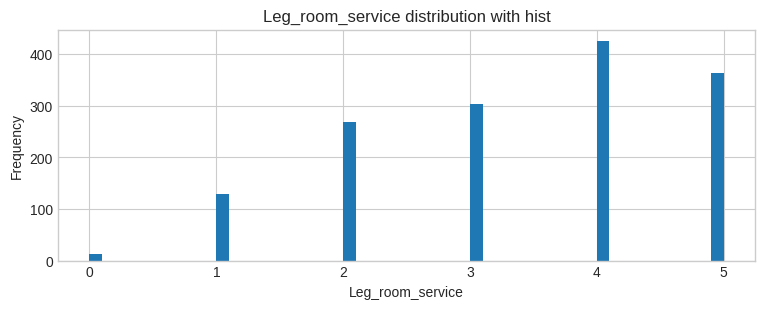

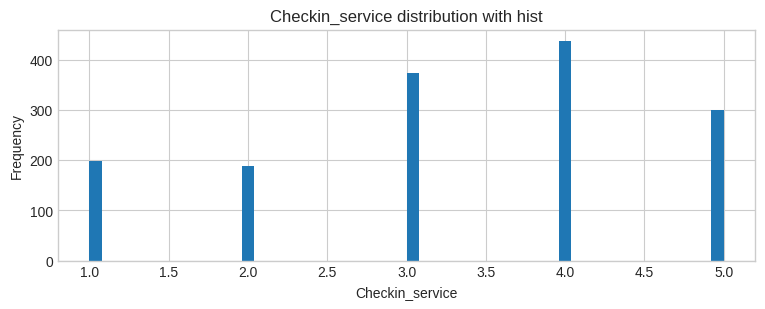

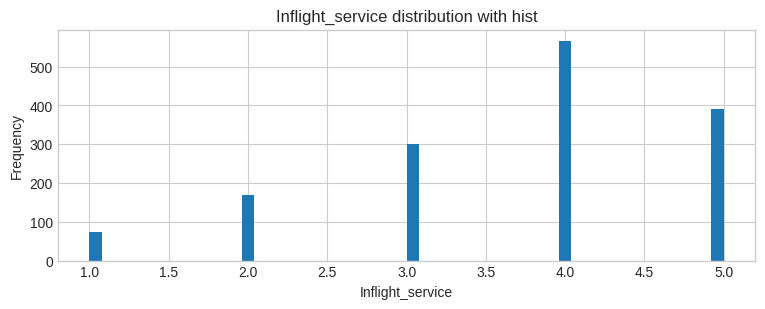

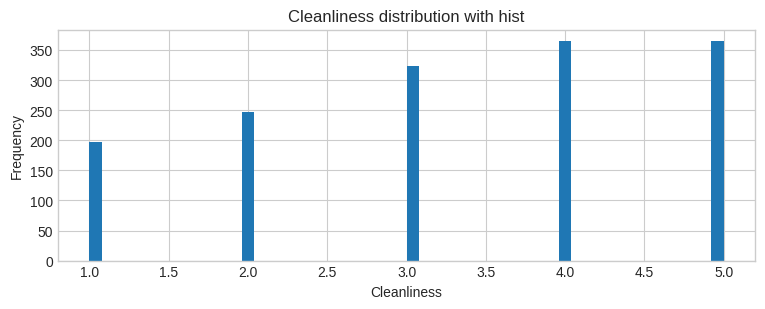

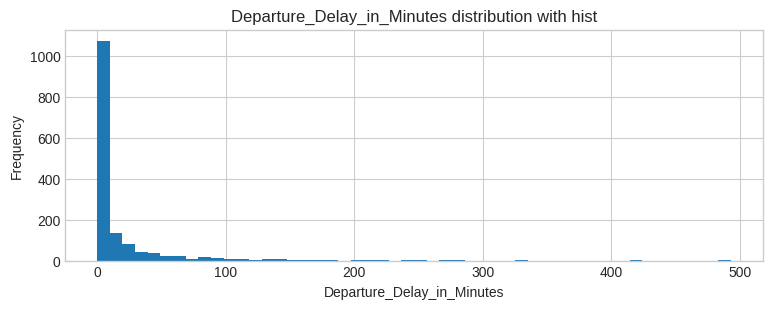

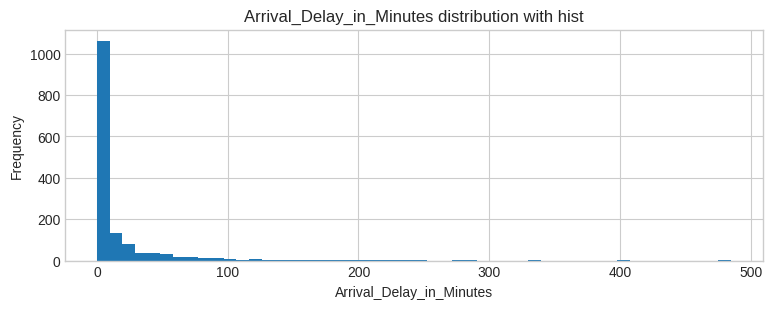

In [ ]:
numerical_var = ["Age", "Flight_Distance", "Inflight_wifi_service", "Departure/Arrival_time_convenient",
                 "Ease_of_Online_booking", "Gate_location", "Food_and_drink", "Online_boarding", "Seat_comfort",
                 "Inflight_entertainment", "On-board_service", "Leg_room_service", "Checkin_service",
                 "Inflight_service", "Cleanliness", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]
for n in numerical_var:
    plot_hist(n)

**BASIC DATA ANALYSIS WITH VISUALIZATON**




In [ ]:
!pip install -U seaborn

   Gender  satisfaction
1    Male      0.467721
0  Female      0.452092


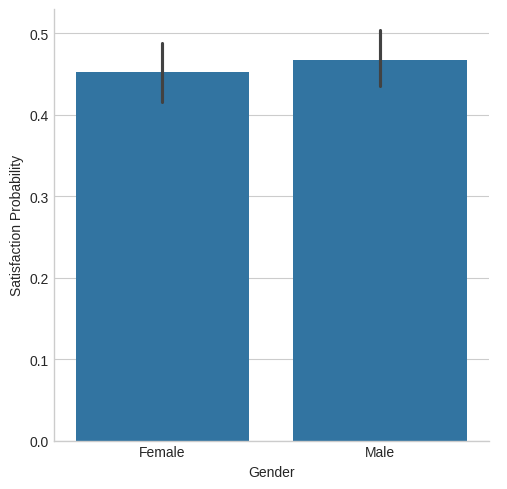

In [ ]:
# Gender vs Satisfaction
print(train_df[["Gender","satisfaction"]].groupby(["Gender"], as_index = False).mean().sort_values(by="satisfaction",ascending = False))

g = sns.catplot(x = "Gender", y = "satisfaction", data = train_df, kind = "bar")
g.set_ylabels("Satisfaction Probability")
plt.show()

      Class  satisfaction
0  Business      0.713491
2  Eco Plus      0.273504
1       Eco      0.218373


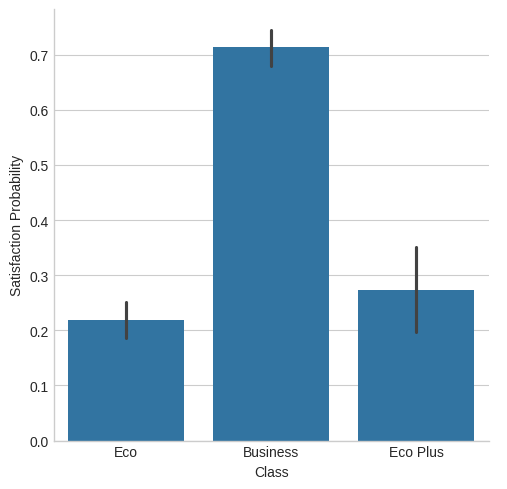

In [ ]:
# Class vs satisfaction
print(train_df[["Class","satisfaction"]].groupby(["Class"], as_index = False).mean().sort_values(by="satisfaction",ascending = False))

g = sns.catplot(x = "Class", y = "satisfaction", data = train_df, kind = "bar")
g.set_ylabels("Satisfaction Probability")
plt.show()

       Customer_Type  satisfaction
0     Loyal Customer      0.508900
1  disloyal Customer      0.231061


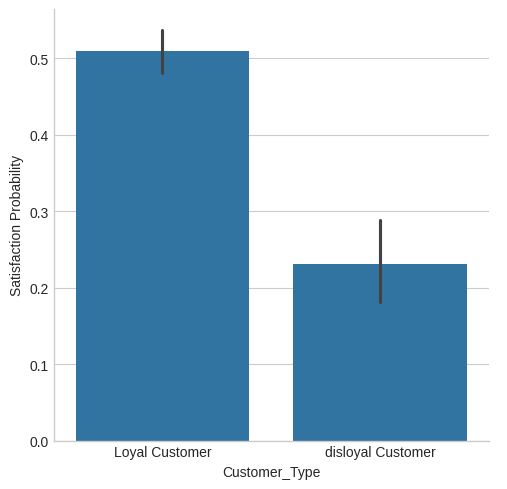

In [ ]:
# Customer_Type vs satisfaction
print(train_df[["Customer_Type","satisfaction"]].groupby(["Customer_Type"], as_index = False).mean().sort_values(by="satisfaction",ascending = False))


g = sns.catplot(x = "Customer_Type", y = "satisfaction", data = train_df, kind = "bar")
g.set_ylabels("Satisfaction Probability")
plt.show()

    Type_of_Travel  satisfaction
0  Business travel      0.597948
1  Personal Travel      0.114486


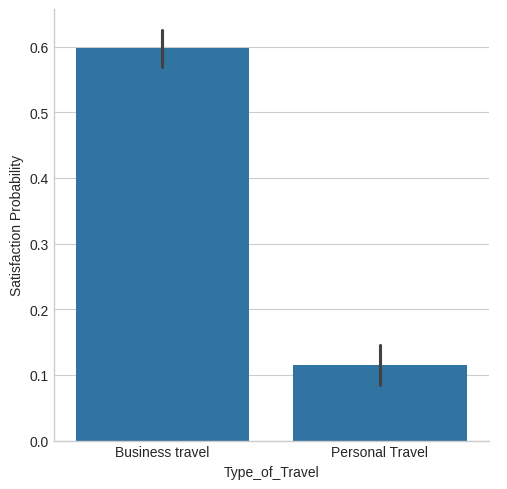

In [ ]:
# Customer_Type vs satisfaction
print(train_df[["Type_of_Travel","satisfaction"]].groupby(["Type_of_Travel"], as_index = False).mean().sort_values(by="satisfaction",ascending = False))


g = sns.catplot(x = "Type_of_Travel", y = "satisfaction", data = train_df, kind = "bar")
g.set_ylabels("Satisfaction Probability")
plt.show()

**OUTLIER DETECTION**

In [ ]:
#Finding outliers and removing them from data

def detect_outliers(df,features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [ ]:
pd.set_option('display.max_columns', 30)

In [ ]:
train_df.loc[detect_outliers(train_df,["Age", "Flight_Distance", "Inflight_wifi_service", "Departure/Arrival_time_convenient",
                                       "Ease_of_Online_booking", "Gate_location", "Food_and_drink", "Online_boarding",
                                       "Seat_comfort", "Inflight_entertainment", "On-board_service", "Leg_room_service",
                                       "Checkin_service","Inflight_service","Cleanliness", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"])]

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction


In [ ]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age", "Flight_Distance", "Inflight_wifi_service",
                                                   "Departure/Arrival_time_convenient", "Ease_of_Online_booking",
                                                   "Gate_location", "Food_and_drink", "Online_boarding", "Seat_comfort",
                                                   "Inflight_entertainment", "On-board_service", "Leg_room_service",
                                                   "Checkin_service", "Inflight_service", "Cleanliness",
                                                   "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]),axis = 0).reset_index(drop = True)

**DATA PREPROCESSING**

In [ ]:
#Preparing data to train with a classification algorithm

#Converting "Gender","Type_of_Travel","Customer Type" variables in the data into numerical data types in order to use it in logistic regression model

ctgrs = ["Gender","Customer_Type","Type_of_Travel"]

for x in ctgrs:

    train_df[x] = [1 if each == train_df[x].unique()[0] else 0 for each in train_df[x]]


In [ ]:
# Here, since our variable takes 3 different values (business, eco plus and eco), we converted the data into numerical data with a different method.
# (1=Business, 2=Eco plus, 3=Eco)
train_df.Class = [1 if x == "Business" else 2 if x == "Eco Plus" else 3 for x in train_df.Class]

In [ ]:
train_df.head()


,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,1,52,1,3,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,1,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,3,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,1,1,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,1,3,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1


In [ ]:
 #Training the data with machine learning algorithms

 # For this, we divide train data into dependent (target) and independent variables. finally, we have to make test data ready for processing as we train.

test_df.drop(["Unnamed: 0","id"],axis=1, inplace=True)

test_df.columns = [x.split()[0] + "_" + x.split()[1] + "_" + x.split()[2] + "_" + x.split()[3] if len(x.split()) > 3 else x for x in test_df.columns]
test_df.columns = [x.split()[0] + "_" + x.split()[1] + "_" + x.split()[2] if len(x.split()) > 2 else x for x in test_df.columns]
test_df.columns = [x.split()[0] + "_" + x.split()[1] if len(x.split()) > 1 else x for x in test_df.columns]

In [ ]:
test_df.satisfaction = [1 if x == "satisfied" else 0 for x in test_df.satisfaction]

test_df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1


In [ ]:
ctgrs2 = ["Gender","Customer_Type","Type_of_Travel"]

for x in ctgrs2:

    test_df[x] = [1 if each == test_df[x].unique()[0] else 0 for each in test_df[x]]

test_df.Class = [1 if x == "Business" else 2 if x == "Eco Plus" else 3 for x in test_df.Class]

**TRAIN & TEST SPLIT NORMALIZATION**

In [ ]:
x_train = train_df.drop(["satisfaction"],axis=1)
y_train = train_df.satisfaction.values


x_test = test_df.drop(["satisfaction"],axis=1)
y_test = test_df.satisfaction.values

In [ ]:
x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))

x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))

**LOGISTIC REGRESSION WITH Sklearn**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression()

log.fit(x_train,y_train)

pred = log.predict(x_test)

# Now let's see how successful our predictions are:
print("with Logistic Regression accuracy_score: ",accuracy_score(y_test,pred))

with Logistic Regression accuracy_score:  0.87


**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

print("DecisionTreeClassifier: ", dt.score(x_test,y_test))

DecisionTreeClassifier:  0.99


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)

rf.fit(x_train,y_train)

print("with Random Forest score: ",rf.score(x_test,y_test))

with Random Forest score:  1.0


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)

pred_for_knn = knn.predict(x_test)

print("with KNeighborsClassifier score: ",knn.score(x_test, y_test))

with KNeighborsClassifier score:  0.94


if k values is 1 value score 1.0
if k values is 2 value score 0.93
if k values is 3 value score 0.94
if k values is 4 value score 0.9166666666666666
if k values is 5 value score 0.9133333333333333
if k values is 6 value score 0.8933333333333333
if k values is 7 value score 0.8966666666666666
if k values is 8 value score 0.8933333333333333
if k values is 9 value score 0.8933333333333333
if k values is 10 value score 0.88
if k values is 11 value score 0.8866666666666667
if k values is 12 value score 0.88
if k values is 13 value score 0.8866666666666667
if k values is 14 value score 0.8866666666666667
if k values is 15 value score 0.88
if k values is 16 value score 0.89
if k values is 17 value score 0.8833333333333333
if k values is 18 value score 0.8833333333333333


if k values is 19 value score 0.8833333333333333


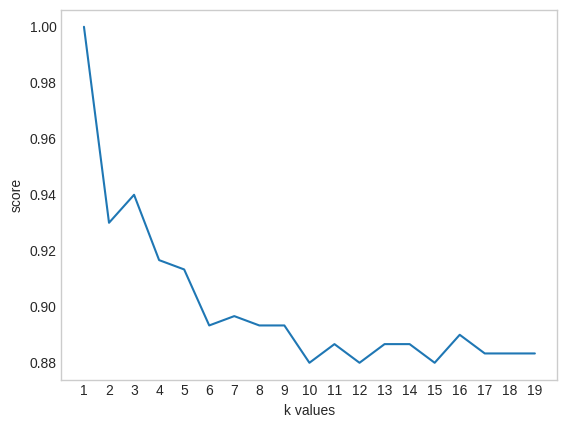

In [ ]:
# We got an accuracy score of 94%, but we can change the K value and look at the success results of the algorithm and find the optimum K value.

score_list = []

for x in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=x)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    print("if k values is",x,"value score",knn2.score(x_test,y_test))


plt.plot(range(1,20),score_list)
plt.xticks(range(1,20))
plt.xlabel("k values")
plt.ylabel("score")
plt.legend()
plt.grid()
plt.show()